In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import datetime as dt
from pandas.plotting import table
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [76]:
data=pd.read_csv('london_merged.csv')
data.head(2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0


In [3]:
data.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [78]:
data['timestamp']=pd.to_datetime(data['timestamp'])
data.weather_code=data.weather_code.astype(int)
data.is_holiday=data.is_holiday.astype(int)
data.is_weekend=data.is_weekend.astype(int)
data.season=data.season.astype(int)

In [8]:
data.tail(2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4,0,0,3
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2,0,0,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8F2033208>,
      dtype=object)

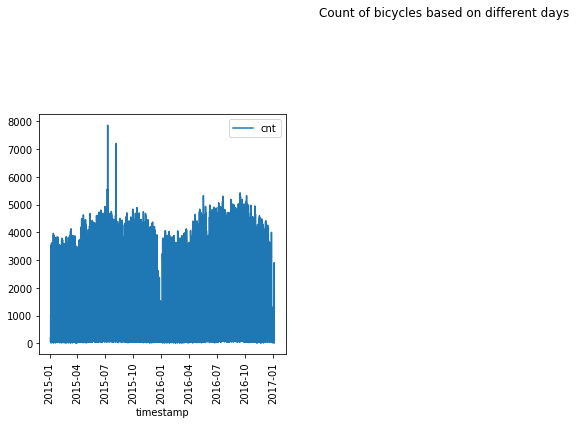

In [9]:
data.plot(x='timestamp',y='cnt', subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "Count of bicycles based on different days", rot = 90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8F2467D08>,
      dtype=object)

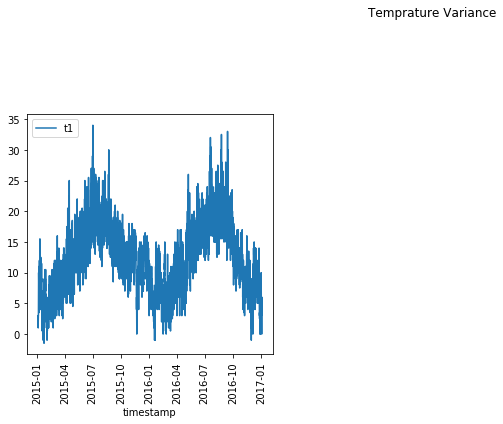

In [10]:
data.plot(x='timestamp',y='t1', subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "Temprature Variance", rot = 90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8F298E488>,
      dtype=object)

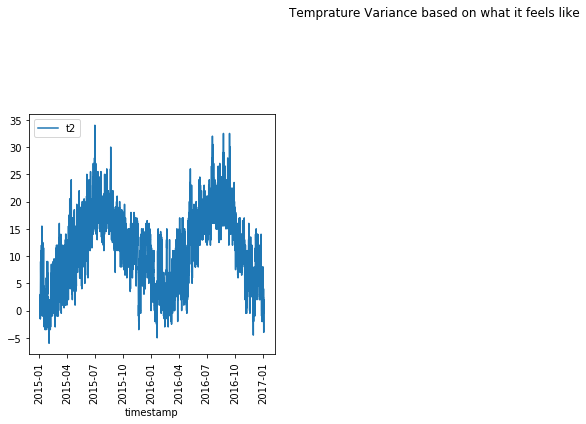

In [11]:
data.plot(x='timestamp',y='t2', subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "Temprature Variance based on what it feels like", rot = 90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8F3908308>,
      dtype=object)

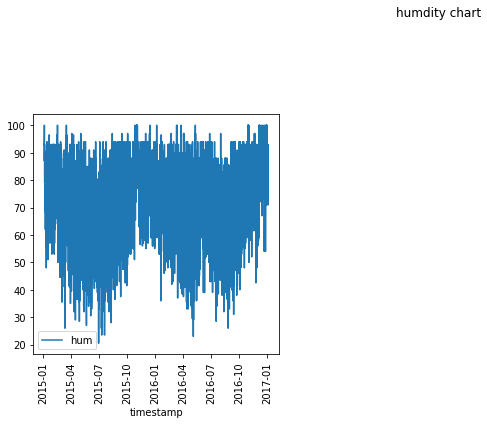

In [16]:
data.plot(x='timestamp',y='hum', subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "humdity chart", rot = 90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8F50D0B88>,
      dtype=object)

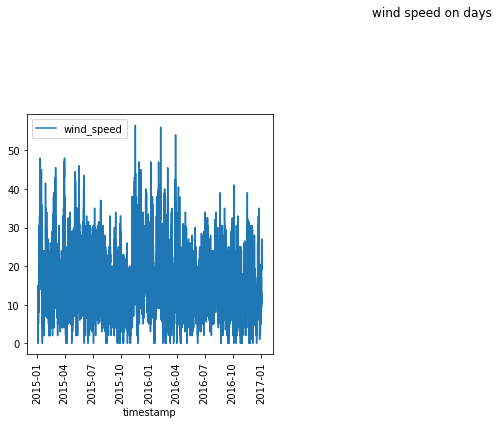

In [17]:
data.plot(x='timestamp',y='wind_speed', subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "wind speed on days", rot = 90)

In [12]:
def bar_plot(variable):
    #get feature
    var = data[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
   
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))

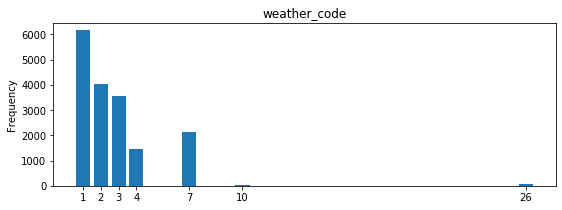

weather_code: 
 1     6150
2     4034
3     3551
7     2141
4     1464
26      60
10      14
Name: weather_code, dtype: int64


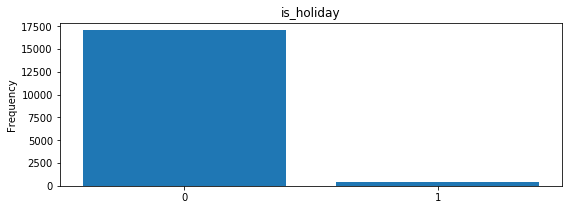

is_holiday: 
 0    17030
1      384
Name: is_holiday, dtype: int64


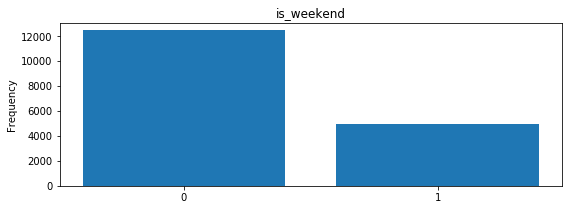

is_weekend: 
 0    12444
1     4970
Name: is_weekend, dtype: int64


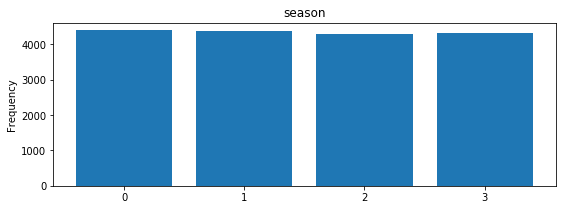

season: 
 0    4394
1    4387
3    4330
2    4303
Name: season, dtype: int64


In [13]:
category1 = ["weather_code","is_holiday","is_weekend","season"]
for c in category1:
    bar_plot(c)

In [14]:
def plot_hist(variable):
    plt.figure(figsize =(9,3))
    plt.hist(data[variable], bins =50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

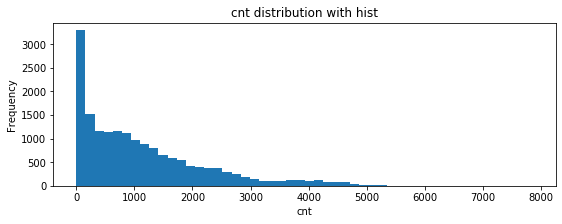

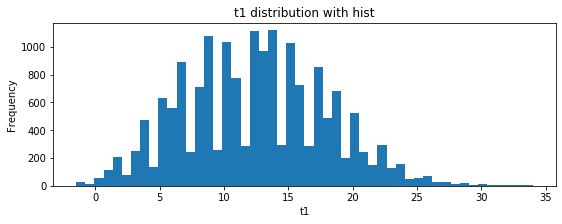

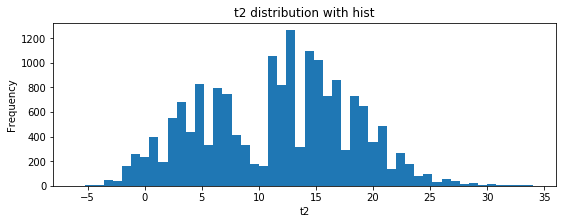

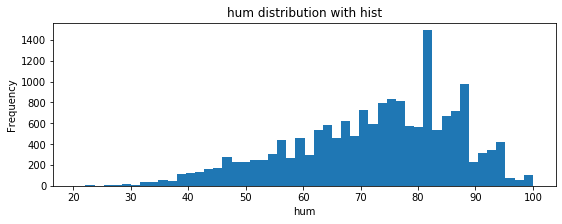

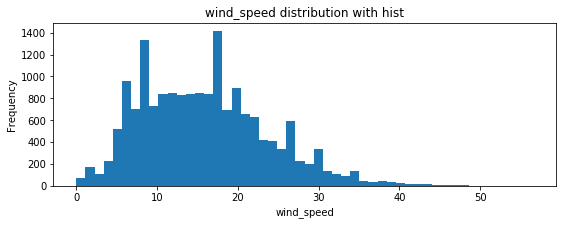

In [15]:
numericVar = ["cnt", "t1", "t2","hum","wind_speed"]
for n in numericVar:
    plot_hist(n)


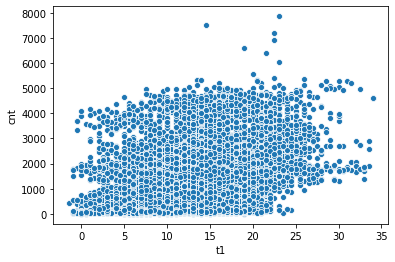

In [19]:
sns.scatterplot(x='t1',y='cnt',data=data)

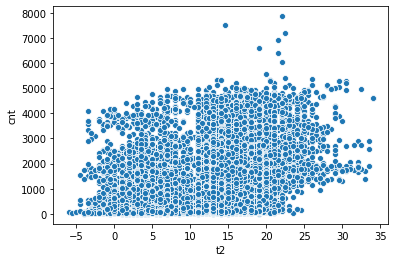

In [20]:
sns.scatterplot(x='t2',y='cnt',data=data)

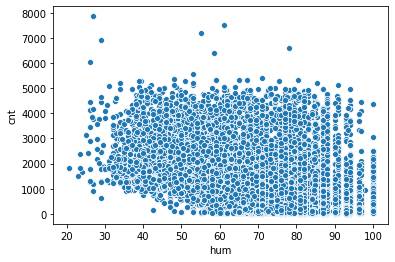

In [21]:
sns.scatterplot(x='hum',y='cnt',data=data)

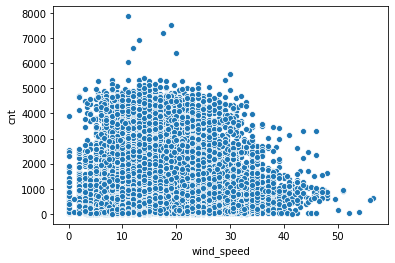

In [22]:
sns.scatterplot(x='wind_speed',y='cnt',data=data)

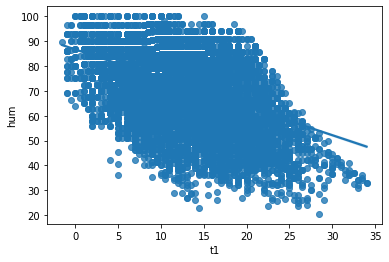

In [27]:
sns.regplot(x='t1',y='hum',data=data)

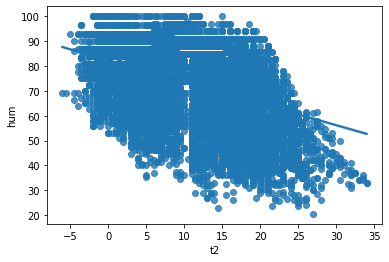

In [28]:
sns.regplot(x='t2',y='hum',data=data)

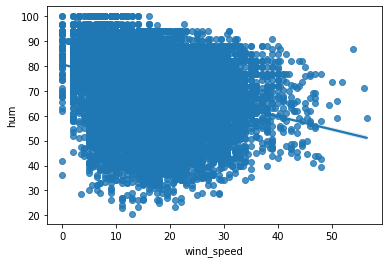

In [29]:
sns.regplot(x='wind_speed',y='hum',data=data)

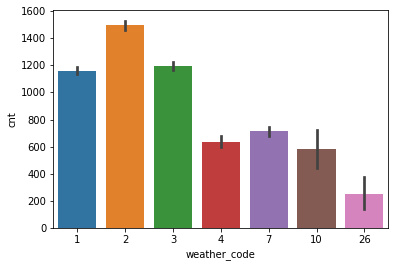

In [23]:
sns.barplot(x='weather_code',y='cnt',data=data)

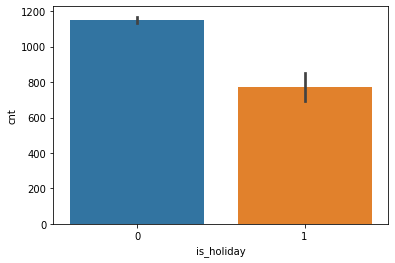

In [24]:
sns.barplot(x='is_holiday',y='cnt',data=data)

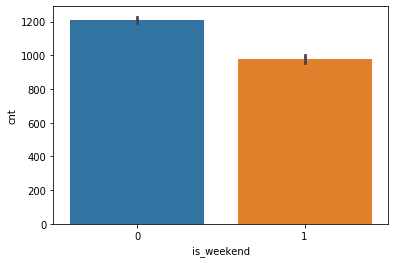

In [25]:
sns.barplot(x='is_weekend',y='cnt',data=data)

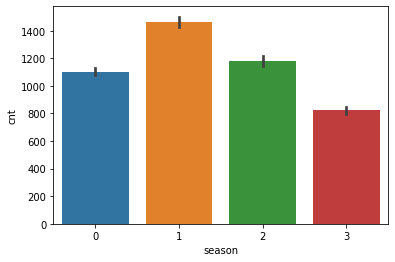

In [26]:
sns.barplot(x='season',y='cnt',data=data)

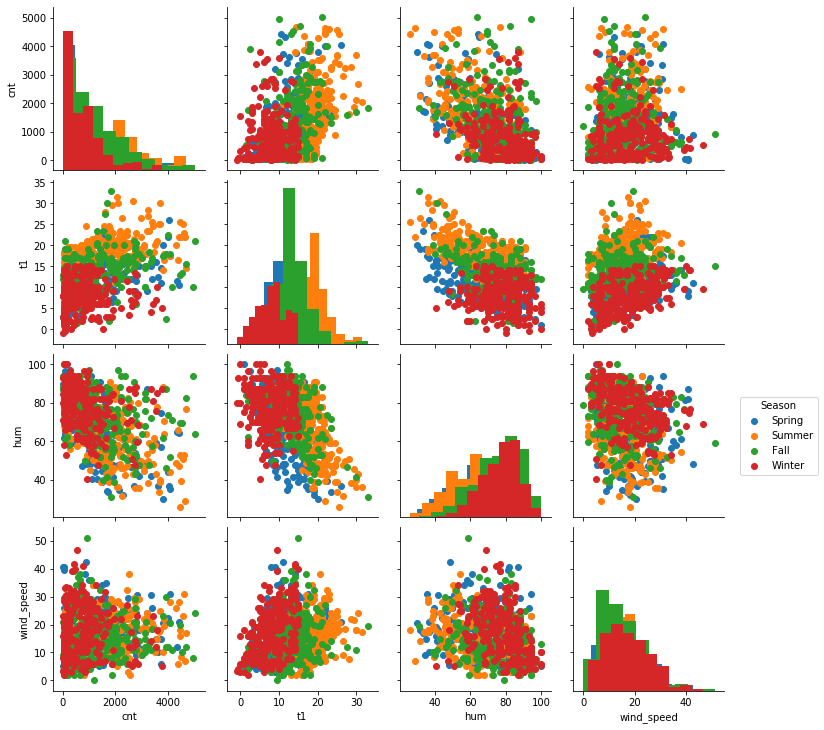

In [31]:
data_sample = data.sample(1000)
p = sns.PairGrid(data=data_sample, vars=['cnt','t1', 'hum', 'wind_speed'], hue="season")
p.map_diag(plt.hist)
p.map_offdiag(plt.scatter)
plt.legend(title='Season', loc='center right', bbox_to_anchor=(1.65, 0.5), ncol=1, labels=['Spring', 'Summer', 'Fall', 'Winter'])

In [79]:
data['Year'] = data['timestamp'].dt.year
data['Month'] = data['timestamp'].dt.month
data['WeekDay'] = data['timestamp'].dt.weekday

data['Hour']=data['timestamp'].apply(lambda time: time.hour) 

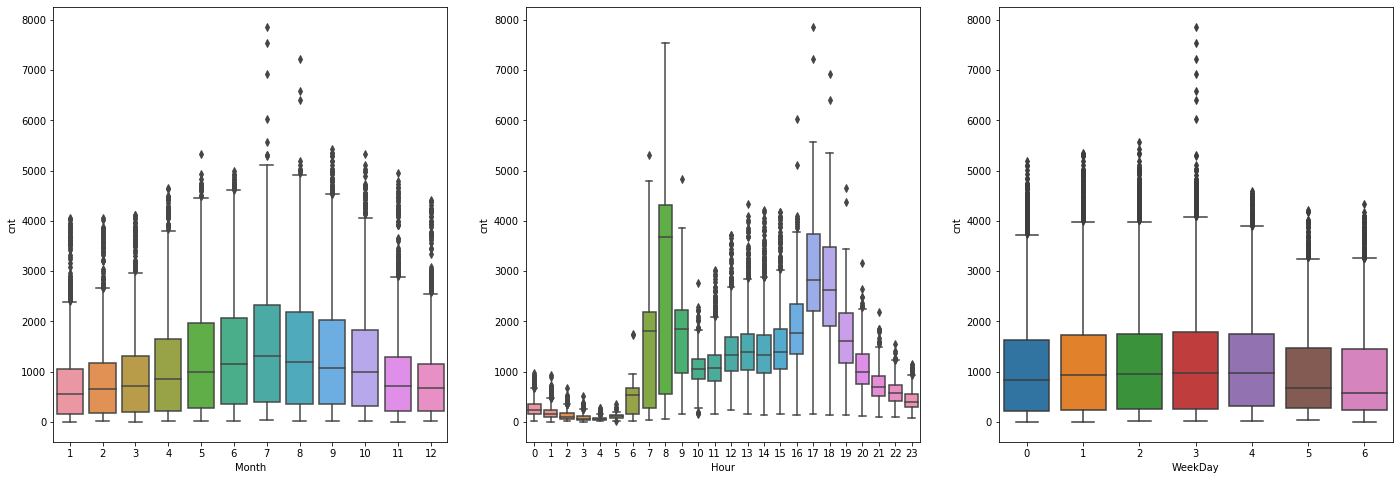

In [39]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(24, 8)

sns.boxplot(data=data, x='Month', y='cnt', ax=ax1)
sns.boxplot(data=data, x='Hour', y='cnt', ax=ax2)
sns.boxplot(data=data, x='WeekDay', y='cnt', ax=ax3)

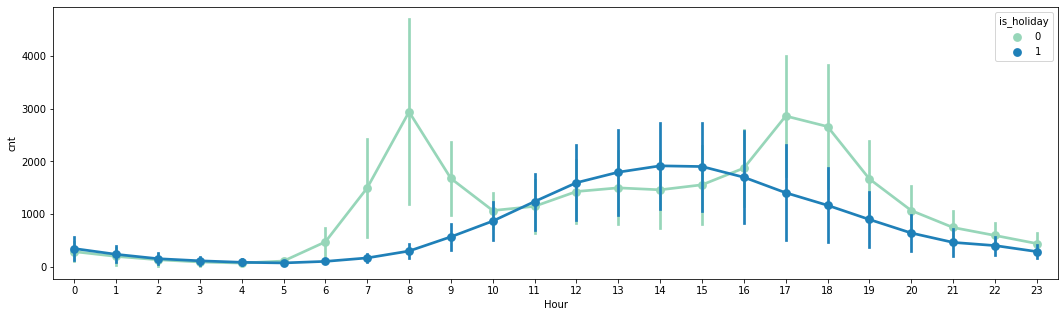

In [40]:
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(18,5)

sns.pointplot(data=data, x='Hour', y='cnt', ci="sd", hue='is_holiday', ax=ax1, palette='YlGnBu')